In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append("../")
from sklearn.metrics import mean_squared_error
import re

In [2]:
distances_unseen=[2,4,10,20,25,35]
distances_testdata = [1,3,15,30]
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/'

In [3]:
# Parameters
distances_unseen = [2, 4, 10, 20, 25, 35]
distances_testdata = [1, 3, 15, 30]
saved_models = "/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/"


In [4]:
import numpy as np

In [5]:
regex = re.compile(r'\d+')

In [6]:
%matplotlib inline

In [7]:
from core.utils.data import define_dataset, select_dist

In [8]:
from core.utils.inference import inference_phase_rUNet, inference_phase_rUNet_plot_notebook

In [9]:
from core.models import rUNet

In [10]:
import torch

In [11]:
DATA_DIR_DEEPTHOUGHT = "/storage/yw18581/data"

In [12]:
data_dir = DATA_DIR_DEEPTHOUGHT

In [13]:
root_folder = os.path.join(data_dir, "dataset")

In [14]:
excluded_testdata = select_dist(dist_list=distances_testdata, root_folder=root_folder)

In [15]:
excluded_testdata

['10x10_1mm_second_clean',
 '10x10_1mm_third_clean',
 '10x10_1mm_first_clean',
 '10x10_3mm_second_clean',
 '10x10_3mm_third_clean',
 '10x10_3mm_first_clean',
 '10x10_15mm_second_clean',
 '10x10_15mm_third_clean',
 '10x10_15mm_first_clean',
 '10x10_30mm_second_clean',
 '10x10_30mm_third_clean',
 '10x10_30mm_first_clean']

In [16]:
excluded_unseen = select_dist(dist_list=distances_unseen, root_folder=root_folder)

In [17]:
excluded_unseen

['10x10_2mm_second_clean',
 '10x10_2mm_third_clean',
 '10x10_2mm_first_clean',
 '10x10_4mm_second_clean',
 '10x10_4mm_third_clean',
 '10x10_4mm_first_clean',
 '10x10_10mm_second_clean',
 '10x10_10mm_third_clean',
 '10x10_10mm_first_clean',
 '10x10_20mm_second_clean',
 '10x10_20mm_third_clean',
 '10x10_20mm_first_clean',
 '10x10_25mm_second_clean',
 '10x10_25mm_third_clean',
 '10x10_25mm_first_clean',
 '10x10_35mm_second_clean',
 '10x10_35mm_third_clean',
 '10x10_35mm_first_clean']

In [18]:
data_loaders_test, data_lengths_test = define_dataset(root_folder, batch_size=16, excluded_list=excluded_testdata, alldata=False)

In [19]:
data_lengths_test

{'train': 3456, 'val': 864, 'test': 1080}

In [20]:
data_loaders_unseen, data_lengths_unseen = define_dataset(root_folder, batch_size=16, excluded_list=excluded_unseen, alldata=False)

In [21]:
data_lengths_unseen

{'train': 2261, 'val': 565, 'test': 706}

In [22]:
model_names = os.listdir(saved_models)

In [23]:
model_names

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.75coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_50epochs_0.75coef.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_5epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.7coeff_mask.pkl',


In [24]:
def get_fnames(key):
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith("Trained"):
            if regex.findall(fname.split("_")[6])[1]==str(key):
                f_list.append(fname)
                epochs.append(int(regex.findall(fname.split("_")[5])[0]))
    return f_list, epochs

In [25]:
get_fnames(25)[0]

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_60epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_70epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_80epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.25coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_55epochs_

In [26]:
def mse_vs_epochs(coeff, key, data_loaders, data_lengths):
    mse = []
    f_list, epochs = get_fnames(coeff)
    for fname, e in zip(f_list, epochs):
        print(fname, e)
    
        torch.cuda.empty_cache()
        model= rUNet(out_size=1)
        checkpoint = torch.load(os.path.join(saved_models, fname))['model_state_dict'];
        model.load_state_dict(checkpoint)
        y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                               notebook=True, test=True)
        np.savez_compressed(os.path.join(saved_models, '_'.join(['predicted',
                                                                 key,
                                                                 fname.split('_')[3],
                                                                 fname.split('_')[5],
                                                                 fname.split('_')[6]])
                                         +'.npz'), true=y_true, pred=y_pred)
        mse.append(mean_squared_error(y_true, y_pred))
        
    plt.plot(epochs, mse)
    return mse, epochs

Trained_rUNet_pytorch_6positions_dataset_5epochs_0.25coeff_mask.pkl 5



Trained_rUNet_pytorch_6positions_dataset_45epochs_0.25coeff_mask.pkl 45



Trained_rUNet_pytorch_6positions_dataset_50epochs_0.25coeff_mask.pkl 50



Trained_rUNet_pytorch_6positions_dataset_60epochs_0.25coeff_mask.pkl 60



Trained_rUNet_pytorch_6positions_dataset_70epochs_0.25coeff_mask.pkl 70



Trained_rUNet_pytorch_6positions_dataset_80epochs_0.25coeff_mask.pkl 80



Trained_rUNet_pytorch_6positions_dataset_10epochs_0.25coeff_mask.pkl 10



Trained_rUNet_pytorch_6positions_dataset_15epochs_0.25coeff_mask.pkl 15



Trained_rUNet_pytorch_6positions_dataset_20epochs_0.25coeff_mask.pkl 20



Trained_rUNet_pytorch_6positions_dataset_25epochs_0.25coeff_mask.pkl 25



Trained_rUNet_pytorch_6positions_dataset_30epochs_0.25coeff_mask.pkl 30



Trained_rUNet_pytorch_6positions_dataset_35epochs_0.25coeff_mask.pkl 35



Trained_rUNet_pytorch_6positions_dataset_40epochs_0.25coeff_mask.pkl 40



Trained_rUNet_pytorch_6positions_dataset_55epochs_0.25coeff_mask.pkl 55



Trained_rUNet_pytorch_6positions_dataset_65epochs_0.25coeff_mask.pkl 65



Trained_rUNet_pytorch_6positions_dataset_75epochs_0.25coeff_mask.pkl 75



Trained_rUNet_pytorch_6positions_dataset_85epochs_0.25coeff_mask.pkl 85



Trained_rUNet_pytorch_6positions_dataset_90epochs_0.25coeff_mask.pkl 90



Trained_rUNet_pytorch_6positions_dataset_95epochs_0.25coeff_mask.pkl 95



Trained_rUNet_pytorch_6positions_dataset_100epochs_0.25coeff_mask.pkl 100


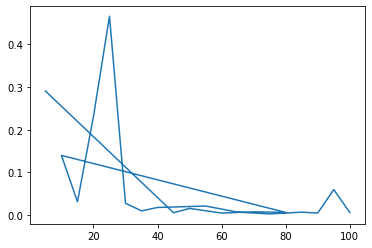

In [27]:
mse025_test, epochs = mse_vs_epochs(25, 'testdata', data_loaders_test, data_lengths_test)

Trained_rUNet_pytorch_6positions_dataset_5epochs_0.25coeff_mask.pkl 5



Trained_rUNet_pytorch_6positions_dataset_45epochs_0.25coeff_mask.pkl 45



Trained_rUNet_pytorch_6positions_dataset_50epochs_0.25coeff_mask.pkl 50



Trained_rUNet_pytorch_6positions_dataset_60epochs_0.25coeff_mask.pkl 60



Trained_rUNet_pytorch_6positions_dataset_70epochs_0.25coeff_mask.pkl 70



Trained_rUNet_pytorch_6positions_dataset_80epochs_0.25coeff_mask.pkl 80



Trained_rUNet_pytorch_6positions_dataset_10epochs_0.25coeff_mask.pkl 10



Trained_rUNet_pytorch_6positions_dataset_15epochs_0.25coeff_mask.pkl 15



Trained_rUNet_pytorch_6positions_dataset_20epochs_0.25coeff_mask.pkl 20



Trained_rUNet_pytorch_6positions_dataset_25epochs_0.25coeff_mask.pkl 25



Trained_rUNet_pytorch_6positions_dataset_30epochs_0.25coeff_mask.pkl 30



Trained_rUNet_pytorch_6positions_dataset_35epochs_0.25coeff_mask.pkl 35



Trained_rUNet_pytorch_6positions_dataset_40epochs_0.25coeff_mask.pkl 40



Trained_rUNet_pytorch_6positions_dataset_55epochs_0.25coeff_mask.pkl 55



Trained_rUNet_pytorch_6positions_dataset_65epochs_0.25coeff_mask.pkl 65



Trained_rUNet_pytorch_6positions_dataset_75epochs_0.25coeff_mask.pkl 75



Trained_rUNet_pytorch_6positions_dataset_85epochs_0.25coeff_mask.pkl 85



Trained_rUNet_pytorch_6positions_dataset_90epochs_0.25coeff_mask.pkl 90



Trained_rUNet_pytorch_6positions_dataset_95epochs_0.25coeff_mask.pkl 95



Trained_rUNet_pytorch_6positions_dataset_100epochs_0.25coeff_mask.pkl 100


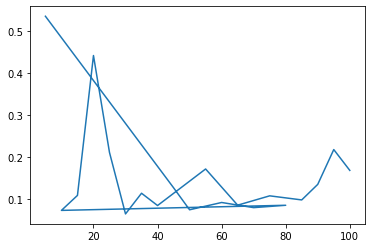

In [28]:
mse025_unseen, epochs = mse_vs_epochs(25, 'unseen', data_loaders_unseen, data_lengths_unseen)

Trained_rUNet_pytorch_6positions_dataset_5epochs_0.3coeff_mask.pkl 5



Trained_rUNet_pytorch_6positions_dataset_10epochs_0.3coeff_mask.pkl 10



Trained_rUNet_pytorch_6positions_dataset_15epochs_0.3coeff_mask.pkl 15



Trained_rUNet_pytorch_6positions_dataset_20epochs_0.3coeff_mask.pkl 20



Trained_rUNet_pytorch_6positions_dataset_25epochs_0.3coeff_mask.pkl 25



Trained_rUNet_pytorch_6positions_dataset_30epochs_0.3coeff_mask.pkl 30



Trained_rUNet_pytorch_6positions_dataset_35epochs_0.3coeff_mask.pkl 35



Trained_rUNet_pytorch_6positions_dataset_40epochs_0.3coeff_mask.pkl 40



Trained_rUNet_pytorch_6positions_dataset_45epochs_0.3coeff_mask.pkl 45



Trained_rUNet_pytorch_6positions_dataset_50epochs_0.3coeff_mask.pkl 50



Trained_rUNet_pytorch_6positions_dataset_55epochs_0.3coeff_mask.pkl 55



Trained_rUNet_pytorch_6positions_dataset_60epochs_0.3coeff_mask.pkl 60



Trained_rUNet_pytorch_6positions_dataset_65epochs_0.3coeff_mask.pkl 65



Trained_rUNet_pytorch_6positions_dataset_70epochs_0.3coeff_mask.pkl 70



Trained_rUNet_pytorch_6positions_dataset_75epochs_0.3coeff_mask.pkl 75



Trained_rUNet_pytorch_6positions_dataset_80epochs_0.3coeff_mask.pkl 80



Trained_rUNet_pytorch_6positions_dataset_85epochs_0.3coeff_mask.pkl 85



Trained_rUNet_pytorch_6positions_dataset_90epochs_0.3coeff_mask.pkl 90



Trained_rUNet_pytorch_6positions_dataset_95epochs_0.3coeff_mask.pkl 95



Trained_rUNet_pytorch_6positions_dataset_100epochs_0.3coeff_mask.pkl 100


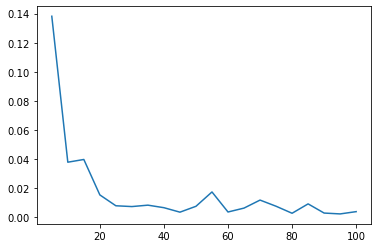

In [29]:
mse030_test, epochs = mse_vs_epochs(3,'testdata',  data_loaders_test, data_lengths_test)

Trained_rUNet_pytorch_6positions_dataset_5epochs_0.3coeff_mask.pkl 5



Trained_rUNet_pytorch_6positions_dataset_10epochs_0.3coeff_mask.pkl 10



Trained_rUNet_pytorch_6positions_dataset_15epochs_0.3coeff_mask.pkl 15



Trained_rUNet_pytorch_6positions_dataset_20epochs_0.3coeff_mask.pkl 20



Trained_rUNet_pytorch_6positions_dataset_25epochs_0.3coeff_mask.pkl 25



Trained_rUNet_pytorch_6positions_dataset_30epochs_0.3coeff_mask.pkl 30



Trained_rUNet_pytorch_6positions_dataset_35epochs_0.3coeff_mask.pkl 35



Trained_rUNet_pytorch_6positions_dataset_40epochs_0.3coeff_mask.pkl 40



Trained_rUNet_pytorch_6positions_dataset_45epochs_0.3coeff_mask.pkl 45



Trained_rUNet_pytorch_6positions_dataset_50epochs_0.3coeff_mask.pkl 50



Trained_rUNet_pytorch_6positions_dataset_55epochs_0.3coeff_mask.pkl 55



Trained_rUNet_pytorch_6positions_dataset_60epochs_0.3coeff_mask.pkl 60



Trained_rUNet_pytorch_6positions_dataset_65epochs_0.3coeff_mask.pkl 65



Trained_rUNet_pytorch_6positions_dataset_70epochs_0.3coeff_mask.pkl 70



Trained_rUNet_pytorch_6positions_dataset_75epochs_0.3coeff_mask.pkl 75



Trained_rUNet_pytorch_6positions_dataset_80epochs_0.3coeff_mask.pkl 80



Trained_rUNet_pytorch_6positions_dataset_85epochs_0.3coeff_mask.pkl 85



Trained_rUNet_pytorch_6positions_dataset_90epochs_0.3coeff_mask.pkl 90



Trained_rUNet_pytorch_6positions_dataset_95epochs_0.3coeff_mask.pkl 95



Trained_rUNet_pytorch_6positions_dataset_100epochs_0.3coeff_mask.pkl 100


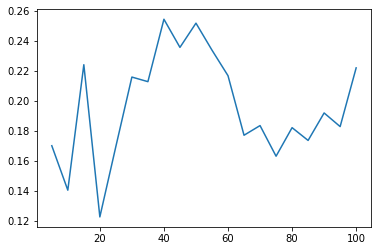

In [30]:
mse030_unseen, epochs = mse_vs_epochs(3,'unseen', data_loaders_unseen, data_lengths_unseen)

Trained_rUNet_pytorch_6positions_dataset_5epochs_0.4coeff_mask.pkl 5



Trained_rUNet_pytorch_6positions_dataset_10epochs_0.4coeff_mask.pkl 10



Trained_rUNet_pytorch_6positions_dataset_15epochs_0.4coeff_mask.pkl 15



Trained_rUNet_pytorch_6positions_dataset_20epochs_0.4coeff_mask.pkl 20



Trained_rUNet_pytorch_6positions_dataset_25epochs_0.4coeff_mask.pkl 25



Trained_rUNet_pytorch_6positions_dataset_30epochs_0.4coeff_mask.pkl 30



Trained_rUNet_pytorch_6positions_dataset_35epochs_0.4coeff_mask.pkl 35



Trained_rUNet_pytorch_6positions_dataset_40epochs_0.4coeff_mask.pkl 40



Trained_rUNet_pytorch_6positions_dataset_45epochs_0.4coeff_mask.pkl 45



Trained_rUNet_pytorch_6positions_dataset_50epochs_0.4coeff_mask.pkl 50



Trained_rUNet_pytorch_6positions_dataset_55epochs_0.4coeff_mask.pkl 55



Trained_rUNet_pytorch_6positions_dataset_60epochs_0.4coeff_mask.pkl 60



Trained_rUNet_pytorch_6positions_dataset_65epochs_0.4coeff_mask.pkl 65



Trained_rUNet_pytorch_6positions_dataset_70epochs_0.4coeff_mask.pkl 70



Trained_rUNet_pytorch_6positions_dataset_75epochs_0.4coeff_mask.pkl 75



Trained_rUNet_pytorch_6positions_dataset_80epochs_0.4coeff_mask.pkl 80



Trained_rUNet_pytorch_6positions_dataset_85epochs_0.4coeff_mask.pkl 85



Trained_rUNet_pytorch_6positions_dataset_90epochs_0.4coeff_mask.pkl 90



Trained_rUNet_pytorch_6positions_dataset_95epochs_0.4coeff_mask.pkl 95



Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl 100


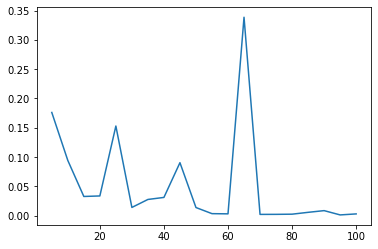

In [31]:
mse040_test, epochs = mse_vs_epochs(4,'testdata',  data_loaders_test, data_lengths_test)

Trained_rUNet_pytorch_6positions_dataset_5epochs_0.4coeff_mask.pkl 5



Trained_rUNet_pytorch_6positions_dataset_10epochs_0.4coeff_mask.pkl 10



Trained_rUNet_pytorch_6positions_dataset_15epochs_0.4coeff_mask.pkl 15



Trained_rUNet_pytorch_6positions_dataset_20epochs_0.4coeff_mask.pkl 20



Trained_rUNet_pytorch_6positions_dataset_25epochs_0.4coeff_mask.pkl 25



Trained_rUNet_pytorch_6positions_dataset_30epochs_0.4coeff_mask.pkl 30



Trained_rUNet_pytorch_6positions_dataset_35epochs_0.4coeff_mask.pkl 35



Trained_rUNet_pytorch_6positions_dataset_40epochs_0.4coeff_mask.pkl 40



Trained_rUNet_pytorch_6positions_dataset_45epochs_0.4coeff_mask.pkl 45



Trained_rUNet_pytorch_6positions_dataset_50epochs_0.4coeff_mask.pkl 50



Trained_rUNet_pytorch_6positions_dataset_55epochs_0.4coeff_mask.pkl 55



Trained_rUNet_pytorch_6positions_dataset_60epochs_0.4coeff_mask.pkl 60



Trained_rUNet_pytorch_6positions_dataset_65epochs_0.4coeff_mask.pkl 65



Trained_rUNet_pytorch_6positions_dataset_70epochs_0.4coeff_mask.pkl 70



Trained_rUNet_pytorch_6positions_dataset_75epochs_0.4coeff_mask.pkl 75



Trained_rUNet_pytorch_6positions_dataset_80epochs_0.4coeff_mask.pkl 80



Trained_rUNet_pytorch_6positions_dataset_85epochs_0.4coeff_mask.pkl 85



Trained_rUNet_pytorch_6positions_dataset_90epochs_0.4coeff_mask.pkl 90



Trained_rUNet_pytorch_6positions_dataset_95epochs_0.4coeff_mask.pkl 95



Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl 100


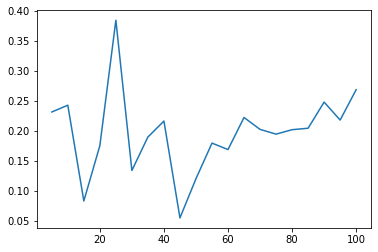

In [32]:
mse040_unseen, epochs = mse_vs_epochs(4,'unseen', data_loaders_unseen, data_lengths_unseen)

def masks_vs_epochs(coeff):
    f_list, epochs = get_fnames(coeff)
    for fname, e in zip(f_list, epochs):
        print(fname, e)
        torch.cuda.empty_cache()
        model= cUNet(out_size=1)
        checkpoint = torch.load(os.path.join(saved_models, 
                                                      fname))['model_state_dict'];
        model.load_state_dict(checkpoint)
        inference_phase_rUNet_plot_notebook(model, data_loaders_mask, data_lengths_mask, batch_size=2,
                                               stop=1, test=False)
    return 

masks_vs_epochs(75)